# Fake News Classifier

data source: https://www.kaggle.com/c/fake-news

Import pandas to read the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'data.csv')

df.head()

x = df.drop('label', axis=1)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [4]:
# drop rows with null values
df = df.dropna()

data = df.copy()
data.reset_index(inplace=True)

y = data['label']

In [5]:
ps = PorterStemmer()

doc = []

for i in range(len(data)):
    clean_text = re.sub('[^a-zA-z]', ' ', data['title'][i])
    clean_text = clean_text.lower()
    clean_text = clean_text.split()
    
    clean_text = [ps.stem(word) for word in clean_text if not word in set(stopwords.words('english'))]
    clean_text = ' '.join(clean_text)
    doc.append(clean_text)
    

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from plot_confusion_matrix import plot_confusion_matrix

In [7]:
X_train, X_test, y_train, y_test = train_test_split(doc, y, test_size=0.33, random_state = 0)

# CountVectorizer

## MultinomialNB

Accuracy: 	 0.9
Confusion matrix without normalization


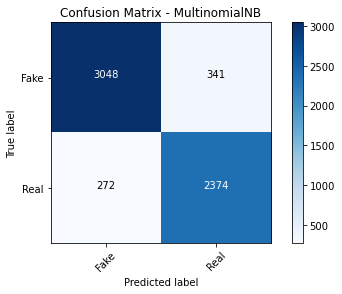

In [8]:
clf_pipeline1 = Pipeline([('count_vec', CountVectorizer(max_features=5000, ngram_range=(1,3))), ('clf', MultinomialNB())])   
clf_pipeline1.fit(X_train, y_train)
y_pred = clf_pipeline1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \t", accuracy.round(2))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Confusion Matrix - MultinomialNB", classes=["Fake", "Real"])

## PassiveAggressiveClassifier

Accuracy Passive Aggressive Classifier: 	 0.92
Confusion matrix without normalization


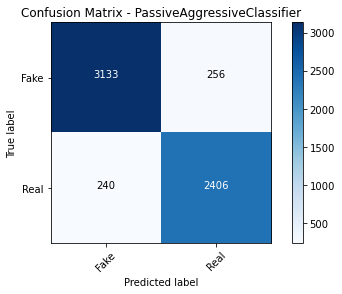

In [9]:
from sklearn.linear_model import PassiveAggressiveClassifier

clf_pipeline2 = Pipeline([('count_vec', CountVectorizer(max_features=5000, ngram_range=(1,3))), ('clf', PassiveAggressiveClassifier(n_iter_no_change=50))])   
clf_pipeline2.fit(X_train, y_train)
y_pred = clf_pipeline2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Passive Aggressive Classifier: \t", accuracy.round(2))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Confusion Matrix - PassiveAggressiveClassifier", classes=["Fake", "Real"])

# TfidfVectorizer

Accuracy: 	 0.88
Confusion matrix without normalization


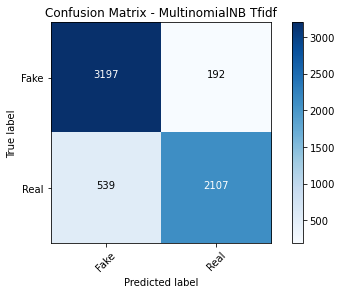

In [11]:
clf_pipeline3 = Pipeline([('count_vec', TfidfVectorizer(max_features=5000, ngram_range=(1,3))), ('clf', MultinomialNB())])   
clf_pipeline3.fit(X_train, y_train)
y_pred = clf_pipeline3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \t", accuracy.round(2))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Confusion Matrix - MultinomialNB Tfidf", classes=["Fake", "Real"])

Accuracy Passive Aggressive Classifier: 	 0.91
Confusion matrix without normalization


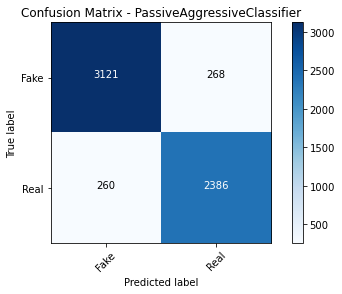

In [12]:
clf_pipeline4 = Pipeline([('count_vec', TfidfVectorizer(max_features=5000, ngram_range=(1,3))), ('clf', PassiveAggressiveClassifier(n_iter_no_change=50))])   
clf_pipeline4.fit(X_train, y_train)
y_pred = clf_pipeline4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Passive Aggressive Classifier: \t", accuracy.round(2))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Confusion Matrix - PassiveAggressiveClassifier", classes=["Fake", "Real"])

# HashingVectorizer

Accuracy: 	 0.87
Confusion matrix without normalization


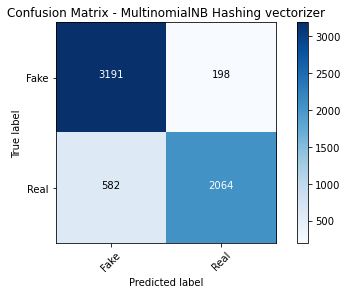

In [17]:
clf_pipeline5 = Pipeline([('hash_vec', HashingVectorizer(n_features=5000, alternate_sign=False  )), ('clf', MultinomialNB())])   
clf_pipeline5.fit(X_train, y_train)
y_pred = clf_pipeline5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \t", accuracy.round(2))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, title="Confusion Matrix - MultinomialNB Hashing vectorizer", classes=["Fake", "Real"])